# Introduction to NN and AE


## Outline

- Introduction to neural network
- Implementation of a simple neural network ([reference](https://towardsdatascience.com/build-a-simple-neural-network-using-numpy-2add9aad6fc8))
- Autoencoder
- Breaking the limitation of the number of layers

## Neural Networks

The recent hype of **AI** is originated in the breakthrough of **deep neural networks**, which is a sub-domain of **machine learning**. For the rest of this course, the algorithms we are going to talk about are all deep-neural-network-related. Hence, before we go any further, we would first learn some foundations of the neural networks.

<img src='https://www.datacatchup.com/wp-content/uploads/2019/05/image.png' width='40%' description='The relationship between AI, machine learning, and deep learing.'/>

A [neural network](https://en.wikipedia.org/wiki/Neural_network) is a network or circuit of neurons, it can refer to a biological neural network made up of real biological neurons, or an artificial neural network that mathematically represents its biological counterpart. 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Blausen_0657_MultipolarNeuron.png/1280px-Blausen_0657_MultipolarNeuron.png' width='60%'/>

A biological neural network (i.e., **[neural circuit](https://en.wikipedia.org/wiki/Neural_circuit)**) is a population of neurons interconnected by synapses to carry out a specific function when activated. The description of such networks can be found in Herbert Spencer's *Principles of Psychology, 3rd edition (1872)*, Theodor Meynert's *Psychiatry (1884)*, William James' *Principles of Psychology (1890)*, and Sigmund Freud's *Project for a Scientific Psychology (composed 1895)*. The first rule of neuronal learning was described by Hebb in 1949, in the Hebbian theory.

<img src='https://www.researchgate.net/profile/Erguen_Akguen/publication/326417061/figure/fig2/AS:648990437679105@1531742786278/Similarity-between-biological-and-artificial-neural-networks-Arbib-2003a-Haykin_W640.jpg' width='50%'/>

In 1943, McCulloch and Pitts created a computational model for neural networks based on mathematics and algorithms. They called this model threshold logic. The model paved the way for neural network research to split into two distinct approaches. One approach focused on biological processes in the brain and the other focused on the application of neural networks to artificial intelligence.

Farley and Clark (1954) first used computational machines, then called calculators, to simulate a Hebbian network at MIT. Other neural network computational machines were created by Rochester, Holland, Habit, and Duda (1956).

Rosenblatt (1958) created the **[perceptron](https://en.wikipedia.org/wiki/Perceptron)**, an algorithm for pattern recognition based on a two-layer learning computer network using simple addition and subtraction. With mathematical notation, Rosenblatt also described circuitry not in the basic perceptron, such as the exclusive-or circuit, a circuit whose mathematical computation could not be processed until after the **[backpropagation](https://en.wikipedia.org/wiki/Backpropagation)** algorithm was created by Werbos (1975).

Now, let's go back to 1975 and rebuild a simple artificial neural network.





## Implementation of a simple neural network

Before the implementation, we need to formulate the problem in a proper form. The figure bellow illustrates a simple neural netowrk with a single input layer (of two variables) mapping directly toward one output variable. 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/A_simple_neural_network_with_two_input_units_and_one_output_unit.png/375px-A_simple_neural_network_with_two_input_units_and_one_output_unit.png' width='30%' />

According to this *graph representation*, we can re-phrase our problem as: **finding the optimal values of $w_1$ and $w_2$ such that the formula $w_1 x_1$ + $w_2 x_2$ = $Y$ yeilds the best performance**. We can further extend the two input variables to $n$ variables, and the problem becomes a *$Y$ = $WX$ problem, where $W = \{w_1, w_2, ..., w_n\}$ and $X = \{x_1, x_2, ..., x_n\}$.

At this level of representation, we would say that a single-layuered NN is almost identical to *[linear regression](https://en.wikipedia.org/wiki/Linear_regression)*, which is also a *$Y$ = $WX$ + $\epsilon$* problem.

As described in previous section, NN is a mathematical mimic of biological neurons, where the *input* stimulus does not directly transfer to the next neron, but through an *activation* process. A neuron is *activated* if the strength of its input passes a certain threshold, $\theta$. Hence, in addition to the simple graph representation, a more precise flowchart can be illustrated as following.

<img src='https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png' width='60%' />

In the new version, the earlier model is wrapped by an activation function, $\phi$, which sneds out a signal $o$ if the value of $\phi(\Sigma(W^TX))$ is greater than the threshold $\theta$. 

Now, the form of our neural network looks exactly like *[logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)*. So, why do we need neural networks if it is the same as regression?

The true distinction between neural networks and other machine learning models is **the way it seraches for the optimal weights, backward-propagation**. 

## Backwardpropagation

In contrast to the logistic regression which minimizes **least-squared error** to find the best weights, $W$, the artificial neural networks employee a more *Bayesian* approach. An **ANN** first calculates the output with current weights as the *forward* step. The difference between the output and the truth is then derived with the *loss function*. And the *loss* hence serves as a **gradient** that propagates backward through the network and adjusts the current weights accordingly.

This two-step learning is different from the least-squared method in several ways:

1. The least-squared method use all training data at once, while the backwardpropagation use a small batch of data incrementally.

2. As long as the least-square method yields a converged solution, the results will be the same regardless of the order of the data. And ANNs will have different training results if:
    - the ordering of the training data changed, 
    - the initial weights changed, or 
    - the strength of the gradient (**learning rate**) changed.


Denote:

- $x$: input (vector of features)
- $y$: target output
- $L$ / $C$: loss or cost function
- $W^{l}$=$(w_{ij}^{l})$: the weights between layer $l-1$ and $l$, where $w_{ij}^{l}$ is the weight between the $i$-th node in layer $l-1$ and the $j$-th node in layer $l$.
- $\phi^{l}$: activation functions at layer $l$.

Since our network has only one layer, we will ignore the notation $l$ and $j$ in the following derivations.

With the notations above, the output of our simple NN can be written as:

$y$ = $o$ = $\phi(\Sigma_{i=1}^{n}w_{i}x_{i})$

where the activation function $\phi$ is non-linear and differentiable sigmoid function:

$\phi(z)$ = $\frac{1}{1-e^{-z}}$

which has a convenient derivative of:

$\frac{d\phi(z)}{dz}$ = $\text{net}$ =$\phi(z)(1-\phi(z))$

This will help us determine the gradient that applies to thwe weights.


### Derive the gradient

We define the term **error**, $E$, as the results of the loss function:

$E = L(t,y)$

, where $t$ is the truth and $y$ is the output.

Calculating the partial derivative of the error with respect to a weight $w_{ij}$ is done using the chain rule twice:

$\frac{\partial E}{\partial w_{i}}$=$\frac{\partial E}{\partial o}\frac {\partial o}{\partial w_{i}}$=$\frac {\partial E}{\partial y}{\frac {\partial y}{\partial {\text{net}}}}{\frac {\partial {\text{net}}}{\partial w_{i}}}$


We can further analyze the three terms in the right hand side one by one (see [reference](https://en.wikipedia.org/wiki/Backpropagation#Derivation)), and resulting in the form of:

$\Delta w_{i}$=-$\eta {\frac {\partial E}{\partial w_{i}}}$=-$\eta o_{i}\delta$

The term $\eta$ is defined as the **learning rate**, which determines the amount of adjustment for each training batch. And if we use the sigmoid function as the activation function, the term $\delta$ is as simple as $(y-t)y(1-y)$.


### Limitation

- Gradient descent with backpropagation is not guaranteed to find the global minimum of the error function, but only a local minimum; also, it has trouble crossing plateaus in the error function landscape. This issue, caused by the non-convexity of error functions in neural networks, was long thought to be a major drawback, but Yann LeCun et al. argue that in many practical problems, it is not.

- Backpropagation learning does not require normalization of input vectors; however, normalization could improve performance.

- Backpropagation requires the derivatives of activation functions to be known at network design time.


Now we have properly formulate the problem, let's implement it in python.

### Data

We use the 0s and 1s in the MINST dataset for demonstration.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# The digits dataset
digits = datasets.load_digits()
# Select only 0 and 1
X = digits.data[(digits.target==0)|(digits.target==1),:]
Y = digits.target[(digits.target==0)|(digits.target==1)]
print(X.shape)
print(Y.shape)
print(pd.crosstab(Y,'count'))

(360, 64)
(360,)
col_0  count
row_0       
0        178
1        182


And then we check if everything is correct.

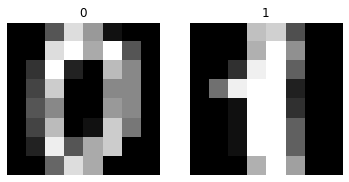

In [2]:
# Create a 2*5 plots for each digit
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, squeeze=False)

# Loop through each class
for i in range(2):
    # Retrieve the first image of the given digit
    img = digits.data[(digits.target==i)][0]
    x = i // 5    # Put the digit to the right row/col
    y = i % 5
    axes[x,y].imshow(img.reshape(8,8), cmap='gray')
    axes[x,y].axis('off')
    axes[x,y].set_title(str(i))

To demonstrate the ANN, we need to split the dataset into training and testing set.

In [3]:
# Separate training and testing data
indices = np.random.permutation(X.shape[0])
training_idx, test_idx = indices[:300], indices[300:]
x_train = X[training_idx,:]
y_train = Y[training_idx]
x_test = X[test_idx,:]
y_test = Y[test_idx]
print(x_train.shape)
print(x_test.shape)
print(pd.crosstab(y_train,'count'))

(300, 64)
(60, 64)
col_0  count
row_0       
0        145
1        155


Though it's not necessary in theory, we know from experience that the ANN can perform better when the input values are scaled around 0.

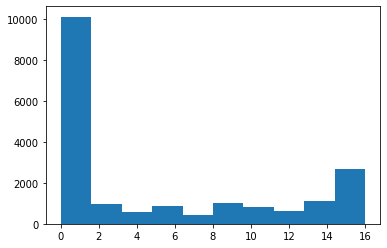

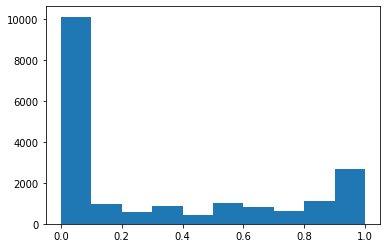

In [4]:
plt.hist(x_train.flatten())
plt.show()
x_train = x_train/16
x_test = x_test/16
plt.hist(x_train.flatten())
plt.show()

And then we implement the simple one-layer ANN.

In [20]:
# The NN
def sigmoid(z):
    return 1/(1+np.exp(-z))

def initialize_parameters(dim):
    w = np.random.randn(dim, 1)*0.01
    b = 0
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    
    #calculate activation function
    A = sigmoid(np.dot(w.T, X)+b)
    #find the cost
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  
    #find gradient (back propagation)
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db} 
    return grads, cost

def gradient_descent(w, b, X, Y, iterations, learning_rate):
    costs = []
    for i in range(iterations):
        grads, cost = propagate(w, b, X, Y)
        
        #update parameters
        w = w - learning_rate * grads["dw"]
        b = b - learning_rate * grads["db"]
        costs.append(cost)
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}    
    return params, costs

def predict(w, b, X):    
    # number of example
    m = X.shape[1]
    y_pred = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        y_pred[0,i] = 1 if A[0,i] >0.5 else 0 
        pass
    return y_pred

def model(train_x, train_y, test_x, test_y, iterations, learning_rate):
    w, b = initialize_parameters(train_x.shape[0])
    parameters, costs = gradient_descent(w, b, train_x, train_y, iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # predict 
    train_pred_y = predict(w, b, train_x)
    test_pred_y = predict(w, b, test_x)
    print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
    print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))
    
    return costs

And now we can test our model with the dataset we prepared earlier. Let's first try a *learning-rate* of 0.0005.

In [21]:
costs = model(x_train.T, y_train.reshape(y_train.shape[0],1).T, x_test.T, y_test.reshape(y_test.shape[0],1).T, iterations = 1000, learning_rate = 0.0005)

Cost after iteration 0: 0.696327
Cost after iteration 100: 0.674435
Cost after iteration 200: 0.653600
Cost after iteration 300: 0.633759
Cost after iteration 400: 0.614856
Cost after iteration 500: 0.596838
Cost after iteration 600: 0.579656
Cost after iteration 700: 0.563264
Cost after iteration 800: 0.547619
Cost after iteration 900: 0.532680
Train Acc: 99.33333333333333 %
Test Acc: 98.33333333333333 %


The results seem good enough, and let's see the training history.

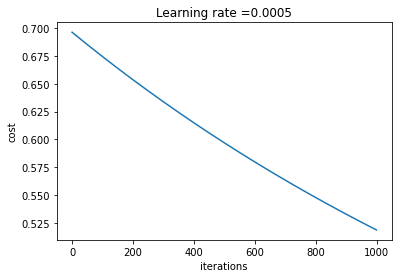

In [22]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.0005))
plt.show()

Now let's try some different learning-rate and see the difference.

Cost after iteration 0: 0.696536
Cost after iteration 100: 0.694239
Cost after iteration 200: 0.691956
Cost after iteration 300: 0.689686
Cost after iteration 400: 0.687429
Cost after iteration 500: 0.685184
Cost after iteration 600: 0.682953
Cost after iteration 700: 0.680733
Cost after iteration 800: 0.678526
Cost after iteration 900: 0.676332
Train Acc: 62.666666666666664 %
Test Acc: 63.333333333333336 %
Cost after iteration 0: 0.693316
Cost after iteration 100: 0.516384
Cost after iteration 200: 0.403949
Cost after iteration 300: 0.329116
Cost after iteration 400: 0.276857
Cost after iteration 500: 0.238755
Cost after iteration 600: 0.209940
Cost after iteration 700: 0.187475
Cost after iteration 800: 0.169509
Cost after iteration 900: 0.154834
Train Acc: 99.33333333333333 %
Test Acc: 100.0 %


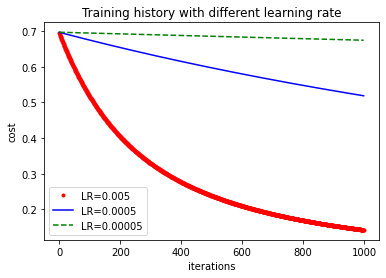

In [24]:
costs5 = model(x_train.T, y_train.reshape(y_train.shape[0],1).T, x_test.T, y_test.reshape(y_test.shape[0],1).T, iterations = 1000, learning_rate = 0.00005)
costs3 = model(x_train.T, y_train.reshape(y_train.shape[0],1).T, x_test.T, y_test.reshape(y_test.shape[0],1).T, iterations = 1000, learning_rate = 0.005)

plt.plot(costs3, 'r.', label='LR=0.005')
plt.plot(costs, 'b-', label='LR=0.0005')
plt.plot(costs5, 'g--', label='LR=0.00005')
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Training history with different learning rate")
plt.legend()
plt.show()

This is the case of a single layer ANN. With similar concept we can extend the number of layers, $L$, to a larger number, while the code will be a bit more complicated (because the formulation can be different for input, hidden, and output layuers). Also, if we want a different *activation function* or a different *cost/loss function*, we need to re-derive the formulation and change certain part of the code.

Fortunately, we now have well-maintained packages for our problem, so that we can implement a complicated model with a few lines of code.